# Homework 12

Finish the development of your code to construct persistence diagrams.

Use your code to examine some data and find persistent homologies, and do some simple analysis.

Your code must do all the following:

1. Read in the data.  CSV files (M_data<indexnumber>.csv) have been uploaded to the blackboard site. These files are comma separated value files, have no text header row, so you need to know each row starts with an identifier number and then has the 10-dimensional feature vector of the data. Each file has something like 75 items.

2. Use a Euclidean metric (without any scaling or taking out correlations).

3. Rank order the metric distances from point to point, so you can filter on thresholds from below the minimum space between any two points to above the maximum space between any two points.

4. For each value of the threshold (it your code runs fast enough step the threshold between every value the metric distance takes), construct a simplicial complex. It can be any complex construction, but make sure it at least includes 0, 1, 2, and 3 dimensional simplices. I have not examined what happens in dimensions higher than 4 dimensional simplices, but feel free to find out and share with all of us. If your code is slow, try to have enough instances through the filtration to be able to find interesting persistent homologies.

5. For each step in the filtration, find the simplicial complex, compute the Euler characteristic, find the homologies, find the ranks of all the homologies, check that the characteristic of the ranks is consistent with the Euler characteristic (a good check to see your code works properly). You need to at least have H0, H1, and H2, but if you can go farther share what you find.

6. Construct some representation of the persistence diagram, and output this. If possible, output it in such a way as can be run through something to graph it or otherwise analyze it, or alternately, graph it in your code.

7. Determine which homologies are persistent and figure out what you can from them. Then provide an analysis of the data.  For example, you may say ‘there seem to be n types of data similar to each other’.  See if you can determine what it means in some sense.

In [1]:
import pandas as pd
import pickle

import matplotlib.pyplot as plt
import numpy as np

import sys, os
tim_path = 'C:\\Users\\Tim\\PycharmProjects\\625.687\src'
ben_path = '/Users/ben/Documents/625.687/src'

if os.path.exists(tim_path):
    sys.path.append(tim_path) # your local repo here
elif os.path.exists(ben_path):
    sys.path.append(ben_path)
else:
    print("Problem accessing src directory.")

In [2]:
from utils import *
import Metrics

## 1. Read in the Data

In [3]:
from glob import glob

datasets = {}
for fname in glob('../data/*.csv'):
    _id = fname.split('/')[-1].split('.')[0].split('data')[-1]
    df = pd.read_csv(fname, names=['r']+[f'f{i}' for i in range(1,11)], index_col=0)
    datasets[_id] = {'data': df}

In [4]:
for df in datasets:
    print(datasets[df]['data'].head())

         f1        f2        f3        f4        f5        f6        f7  \
r                                                                         
1  0.841464  1.311094  2.662422 -1.568054 -0.404108 -2.475253 -1.932087   
2  0.661671  1.702766  2.610921 -1.397946 -1.088667 -2.347672 -1.929252   
3  0.668363  2.221491  2.160714 -0.750779 -1.702540 -1.788230 -2.298690   
4  0.715636  2.371512  2.206615 -0.602472 -2.536616 -1.426515 -2.174885   
5  0.381479  2.691894  1.788278 -0.271486 -2.782082 -0.867906 -1.941072   

         f8        f9       f10  
r                                
1  1.676782  0.092218 -0.282458  
2  1.371181  0.071575 -0.477818  
3  1.382075  0.481905 -0.548661  
4  0.718085  0.669810 -0.730278  
5  0.357116  0.996432 -1.005211  
         f1        f2        f3        f4        f5        f6        f7  \
r                                                                         
1 -0.930424 -2.469092  0.337588 -0.311697 -1.658120 -0.553220 -1.173736   
2 -1.558283

## 2. Use a Euclidean Metric

The general process for this step will be defined by the function below:

In [5]:
mf = Metrics.Metric()

def create_distance_matrix(df, verbose=False):
    dmatrix = []
    for index1, row1 in df.iterrows():
        metric_scores = []
        for index2, row2 in df.iterrows():
            score = mf.L_2_norm(row1, row2)
            metric_scores.append(score)
        dmatrix.append(metric_scores)

    if verbose:
        for row in dmatrix[:5]:
            print(row[:5])
    return dmatrix

### File 1: M_data19112.csv

In [6]:
for ds in datasets:
    datasets[ds]['dmatrix'] = create_distance_matrix(datasets[ds]['data'])

## 3. Rank Order the Metric Distances

First, we will define a function to take a dataset's distance matrix (as generated in step 2) and flatten it to produce a list of distances, plotting a distribution of the distances. The function will return a list of these distances to be stored to the dataset's dictionary for later use.

In [7]:
def analyze_dmatrix(dmatrix, plot=True):
    distances = []
    for r, row in enumerate(dmatrix):
        for c, col in enumerate(row[r+1:]):
            distances.append(col)
    
    print(f"{min(distances)} <= $d$ <= {max(distances)}")
    if plot:
        plt.hist(distances, color='dimgray')

        plt.title(r"$\rho$ Distribution")
        plt.xlabel(r"$\rho$")
        plt.ylabel("Frequency")
        plt.show()

    return distances

In [8]:
def analyze_dmatrix2(dmatrix):
    distances = []
    for r, row in enumerate(dmatrix):
        for c, col in enumerate(row[r+1:]):
            distances.append(col)

analyze_dmatrix2(datasets['19112']['dmatrix'])

Now, running this analysis for each dataset, storing the distance array to the dataset's dictionary:

49242 distance distribution:
2.129654345332516 <= $d$ <= 28.46367331944405


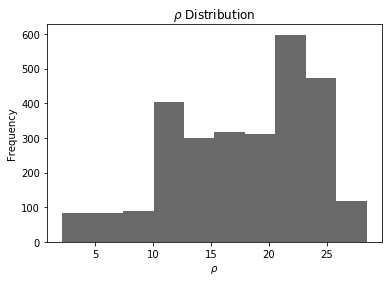


19112 distance distribution:
2.1850593389640007 <= $d$ <= 28.745618744219676


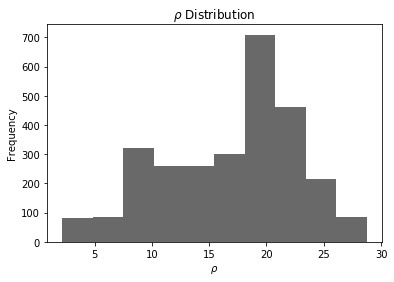


89116 distance distribution:
2.105309798347382 <= $d$ <= 29.616878735153303


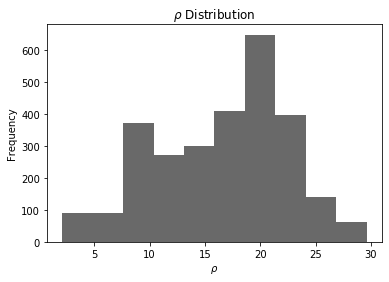


89329 distance distribution:
6.682351320586972 <= $d$ <= 28.128777375456156


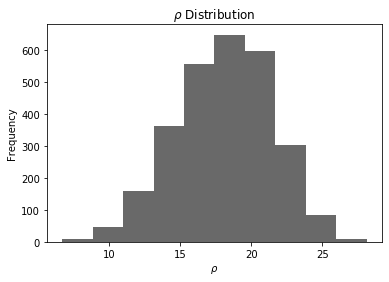


29313 distance distribution:
6.759909318468317 <= $d$ <= 27.071836995131168


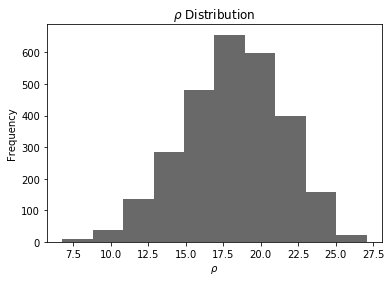


59155 distance distribution:
2.2324852045192194 <= $d$ <= 28.64248711783455


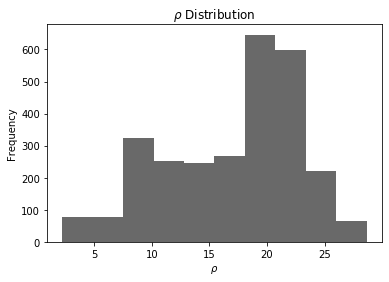


93462 distance distribution:
0.920262235350684 <= $d$ <= 17.652255845218377


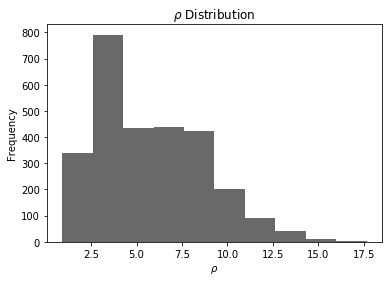


39475 distance distribution:
0.4625312903567421 <= $d$ <= 16.53048569872898


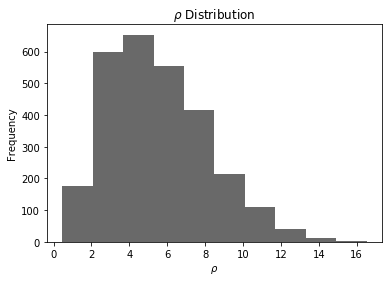


69490 distance distribution:
0.30657924356585625 <= $d$ <= 17.097312992479853


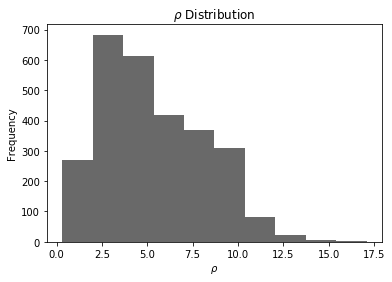


79261 distance distribution:
1.9845560283333863 <= $d$ <= 28.375946700387736


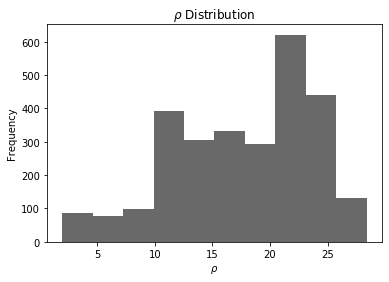


91252 distance distribution:
1.9380964876860194 <= $d$ <= 27.975676451278197


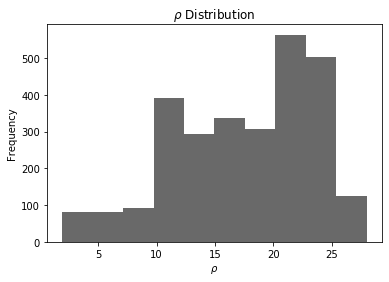


97323 distance distribution:
6.247960647408922 <= $d$ <= 27.182230239237732


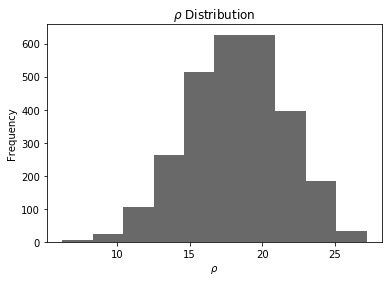

In [9]:
for _id in datasets:
    print(f"{_id} distance distribution:")
    distances = analyze_dmatrix(datasets[_id]['dmatrix'])
    datasets[_id]['distances'] = distances
    print()

These histograms can help provide insight as to the filtration steps at which a significant amount of coalescence will take place.

## 4. Construct a Simplicial Complex

We'll begin by defining a function to handle the generation of balls for a given radius on a dmatrix, as well as a function to generate a simplicial complex from the set of those balls.

In [10]:
def find_balls(dmatrix, radius):
    balls = set()
    for i in range(len(dmatrix)):
        ball_centered_around_i = set()
        for j in range(len(dmatrix)):
            if dmatrix[i][j] <= radius: # Changed this to be inclusive, so that radius 0 returns all vertices. Hoping this doesn't break anything!
                ball_centered_around_i.add(j)
        ball = tuple(sorted(ball_centered_around_i))
        balls.add(ball)
    return balls

In [11]:
from itertools import combinations

def generate_simplicial_complex(balls, max_dim=3, verbose=False):
    """
    Treat each set like it represents a simplicial complex, and generate inclusion power sets all the way down
    (simplicial complexes are closed under intersection; if (abc), then (ab), (ac), and (bc) must be in the set)
    """
    combs = set()
    for simplicial_complex in balls:
        if verbose:
            print(simplicial_complex, "\n")
        for i in range(1, max_dim+2):
            i_length_combos = combinations(simplicial_complex, i)
            for combo in i_length_combos:
                combs.add(tuple(sorted(combo)))
    return combs

    # May need to add a way to compute homologies here? I believe that needs to happen before filtration...

Now, using these functions to build a set of complexes at some subset of the distances at which coalescence occurs in the first dataset, as given by the list `distance` in the dataset's dictionary:

In [13]:
type(generate_simplicial_complex(find_balls(datasets['19112']['dmatrix'], 20)))

set

In [14]:
def filtration(ds, _id, granularity=1):
    """
    Generate a set of simplicial complexes based on the distance set of the complex.
    inputs:
        ds:          the full dictionary of datasets.
        _id:         the ID number of the dataset to be analyzed.
        granularity: the level of detail for the filtration. Default is 1, denoting
                     a computation for every distinct distance found in the dataset.
    """
    ds = ds[_id]
    dist_set = list(sorted({d for d in ds['distances']}))

    if granularity >= 1:
        step_size = 1
    elif granularity > 0:
        step_size = int(len(ds['distances'])*(1-granularity))
    else:
        raise IOError('Your granularity is silliness, don\'t do that.')

    #print(step_size)
    for dist in dist_set[::step_size]:
        balls = find_balls(ds['dmatrix'], dist)
        cmplxs = generate_simplicial_complex(balls)
        
        print(cmplxs)

        # TODO: compute Euler characteristic
        for d in range(5):
            cnt = 0
            for s in cmplxs:
                if len(s) == d:
                    cnt += 1
            print(f"{d}-simplices: {cnt}")
        
        euler_char = sum([1*((-1)**(len(s)-1)) for s in cmplxs])
        print(f"Euler Characteristic at {dist}: {euler_char}")
        # TODO: find H0, H1, H2 homologies
        
        # TODO: compute rank of homologies
        
        # TODO: validate Euler characteristic against homology ranks
        
        # TODO: construct persitence diagrams
        
        # TODO: find out which homologies are persistent 

TODO: Some bug here is causing all of the death distances to be overwritten as `max(ds['distances'])`....

In [15]:
def generate_bbmatrix(datasets, _id, step_size=1, max_dim=1):
    ds = datasets[_id]
    dist_set = list(sorted({d for d in ds['distances']}))
    trunc_dist = [d for d in dist_set[::step_size]]
    #big_boundary = pd.DataFrame()
    #print([[0 for d in range(len(trunc_dist))] for v in find_balls(ds['dmatrix'], 0)])

    big_boundary = np.array([[0 for d in range(len(trunc_dist))] for v in find_balls(ds['dmatrix'], 0)], dtype=np.int8)
    blank_row    = np.array([0 for d in range(len(trunc_dist))], dtype=np.int8)

    prev_cmplx = {v for v in find_balls(ds['dmatrix'], 0)}    
    smplx_to_r = {smplx:r for r, smplx in zip(range(len(prev_cmplx)), prev_cmplx)}
    r_to_smplx = {smplx_to_r[smplx]:smplx for smplx in smplx_to_r}

    # Create dictionary to track lifespan of simplices.
    smplx_lives = {v:[0, None] for v in find_balls(ds['dmatrix'], 0)}

    for d, dist in enumerate(trunc_dist):
        print(dist)
        balls = find_balls(ds['dmatrix'], dist)
        cmplx = generate_simplicial_complex(balls, max_dim=max_dim)

        # For each new simplex in the complex, add a row and mark its
        # constituents (1 dimension lower) as absorbed at this distance.
        new_smplces = cmplx - prev_cmplx
        for s in new_smplces:
            smplx_lives[s] = [dist, None]
            for boundary in combinations(s, len(s)-1):
                # Add boundary to dictionaries and matrix if not yet present.
                if boundary not in smplx_to_r:
                    smplx_to_r[boundary] = len(smplx_to_r)
                    r_to_smplx[smplx_to_r[boundary]] = boundary
                    big_boundary = np.vstack((big_boundary, blank_row))
                    cmplx.add(boundary)
                # If boundary is still alive, kill it.
                if boundary not in smplx_lives:
                    smplx_lives[boundary] = [dist, dist]
                elif smplx_lives[boundary][1] == None:
                    smplx_lives[boundary][1] == dist
                # Mark constituent boundary for absorbtion at this distance.
                big_boundary[smplx_to_r[boundary]][d] = 1
            big_boundary = np.vstack((big_boundary, blank_row))
            # Add a new lookup to the dictionaries
            smplx_to_r[s] = len(smplx_to_r) + 1
            r_to_smplx[smplx_to_r[s]] = s
        prev_complex = cmplx

    # Clean up ending distances set to None.
    for s in smplx_lives:
        if smplx_lives[s][1] == None:
            smplx_lives[s][1] = dist_set[-1]
    
    datasets[_id]['bbmatrix']    = big_boundary
    datasets[_id]['smplx_to_r']  = smplx_to_r
    datasets[_id]['r_to_smplx']  = r_to_smplx
    datasets[_id]['trunc_dist']  = trunc_dist
    datasets[_id]['smplx_lives'] = smplx_lives

    return datasets

datasets = generate_bbmatrix(datasets, '19112', step_size = 50, max_dim=1) #Max_dim=2 is quite expensive

2.1850593389640007
3.002060723069853
5.202901195617489
6.910779050292692
8.0789421032533
8.999937467289984
9.314629730877888
9.514205622503274
9.696399991158465
9.899779298751271
10.301910326149196
10.66035192546054
11.187400459970704
11.725870860131993
12.267439556051915
12.848292759511466
13.347398063174333
13.753664652036743
14.365788555545173
14.939936048904936
15.437483125773575
15.848556300846505
16.364286724245986
16.90717666677343
17.341688582491592
17.686701704379377
18.081889257897807
18.33236913592013
18.558484378811773
18.732766913309757
18.88531008671986
19.01457554734577
19.159190324370183
19.33268175576662
19.48128090458569
19.682784924444707
19.89228609497759
20.072534008843785
20.273934756607044
20.491409539440593
20.731083912894025
20.92800142723873
21.184851197705946
21.374879521183225
21.620760721051617
21.910098435610433
22.209775970879598
22.49817390832981
22.923788202579114
23.248352809036973
23.697305164929595
24.14439246771337
24.569396538250786
25.270349912245

In [127]:
print()

In [ ]:
def reduce_bbmatrix(bbmatrix, smplx_to_r, r_to_smplx, trunc_dist):
    column_sums = {d:[i] for i, d in enumerate(trunc_dist)}
    for c in range(len(bbmatrix[0])):
        # Identify pivot for the column.
        for r in range(len(bbmatrix)):
            if bbmatrix[r][c] == 1:
                pivot = r
        # For all remaining columns in the matrix:
        for cc in range(c+1, len(bbmatrix[0])):
            # If the entry needs to be cancelled...
            if bbmatrix[pivot][cc] == 1:
                # Add the pivot column to it.
                for rr in bbmatrix:
                    bbmatrix[rr][cc] ^= bbmatrix[rr][c]
                column_sums[cc].append(c)
        print(c, column_sums[c])

    return bbmatrix, column_sums

reduce_bbmatrix(test[0], test[1], test[2], test[3])

Stuff pulled from https://jeremykun.com/2013/04/10/computing-homology/

In [88]:
def rowSwap(A, i, j):
   temp = numpy.copy(A[i, :])
   A[i, :] = A[j, :]
   A[j, :] = temp
 
def colSwap(A, i, j):
   temp = numpy.copy(A[:, i])
   A[:, i] = A[:, j]
   A[:, j] = temp
 
def scaleCol(A, i, c):
   A[:, i] *= c*numpy.ones(A.shape[0])
 
def scaleRow(A, i, c):
   A[i, :] *= c*numpy.ones(A.shape[1])
 
def colCombine(A, addTo, scaleCol, scaleAmt):
   A[:, addTo] += scaleAmt * A[:, scaleCol]
 
def rowCombine(A, addTo, scaleRow, scaleAmt):
   A[addTo, :] += scaleAmt * A[scaleRow, :]

def simultaneousReduce(A, B):
   if A.shape[1] != B.shape[0]:
      raise Exception("Matrices have the wrong shape.")
 
   numRows, numCols = A.shape # col reduce A
 
   i,j = 0,0
   while True:
      if i >= numRows or j >= numCols:
         break
 
      if A[i][j] == 0:
         nonzeroCol = j
         while nonzeroCol < numCols and A[i,nonzeroCol] == 0:
            nonzeroCol += 1
 
         if nonzeroCol == numCols:
            j += 1
            continue
 
         colSwap(A, j, nonzeroCol)
         rowSwap(B, j, nonzeroCol)
 
      pivot = A[i,j]
      scaleCol(A, j, 1.0 / pivot)
      scaleRow(B, j, 1.0 / pivot)
 
      for otherCol in range(0, numCols):
         if otherCol == j:
            continue
         if A[i, otherCol] != 0:
            scaleAmt = -A[i, otherCol]
            colCombine(A, otherCol, j, scaleAmt)
            rowCombine(B, j, otherCol, -scaleAmt)
 
      i += 1; j+= 1
 
   return A,B

In [27]:
complexes_19112 = filtration(datasets, '19112', granularity=.1)

{(21,), (32,), (59,), (23,), (34,), (61,), (72,), (9,), (36,), (63,), (74,), (11,), (38,), (49,), (13,), (24,), (51,), (15,), (26,), (53,), (64,), (1,), (28,), (55,), (66,), (3,), (30,), (41,), (68,), (5,), (16,), (43,), (70,), (7,), (18,), (45,), (56,), (20,), (47,), (58,), (22,), (33,), (60,), (8,), (35,), (62,), (73,), (10,), (37,), (48,), (12,), (39,), (50,), (14,), (25,), (52,), (0,), (27,), (54,), (65,), (2,), (29,), (40,), (67,), (4,), (31,), (42,), (69,), (6,), (17,), (44,), (71,), (19,), (46,), (57,)}
0-simplices: 0
1-simplices: 75
2-simplices: 0
3-simplices: 0
4-simplices: 0
Euler Characteristic at 2.1850593389640007: 75


KeyboardInterrupt: 

## 5. Computations

In [39]:
import utils

# Represent the simplicial complexes as one-hot vectors
vectors_19112, mapping_19112 = utils.build_custom_complex(complexes_19112)

# Boundary matrices
reverse_mappingA  = {v:k for k,v in mappingA.items()}
#boundary_mapA_d1 = utils.generate_boundary_map(vectorsA, dim=1, mapping=reverse_mappingA)
boundary_mapA_d2 = utils.generate_boundary_map(vectorsA, dim=2, mapping=reverse_mappingA)
#boundary_mapA_d3 = utils.generate_boundary_map(vectorsA, dim=3, mapping=reverse_mappingA)

In [ ]:
from collections import defaultdict
from itertools import combinations


def is_cycle(tuples_list):
  """
  Take a list of tuples (or list of lists), return whether or not that 
  list forms a cycle
  """
  points_count = defaultdict(int)
  for tup in tuples_list:
    for elem in tup:
      points_count[elem] += 1
  is_cycle = True
  for val in points_count.values():
    if val % 2 != 0:
      is_cycle = False
  return is_cycle

def linear_combinations(tuples_list, n):
  """
  Take a set of tuples, expand out the possible combinations of their elements,
  if that combination forms a cycle, save it off
  """
  tuples_list = [tuple(i) for i in tuples_list]
  combs = set()
  for i in range(1, len(tuples_list)):
      i_length_combos = combinations(tuples_list, i)
      for combo in i_length_combos:
          if is_cycle(combo):
            combs.add(tuple(combo))
  return combs

combs = linear_combinations(boundary_mapA_d2.index, 0)

## 6. Persistence Diagrams

2775


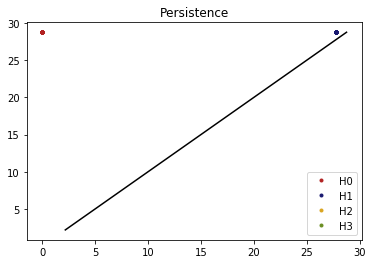

In [16]:
def persistence_diagram(datasets, _id, plot=True):
    smplx_lives = datasets[_id]['smplx_lives']
    H = {0:{'bs':[], 'ds':[]},
         1:{'bs':[], 'ds':[]},
         2:{'bs':[], 'ds':[]},
         3:{'bs':[], 'ds':[]}}
    colors = ['firebrick', 'midnightblue', 'goldenrod', 'olivedrab']
    for s in smplx_lives:
        dim = len(s)-1
        b = smplx_lives[s][0]
        d = smplx_lives[s][1]
        H[dim]['bs'].append(b)
        H[dim]['ds'].append(d)

    print(len(H[1]['bs']))

    if plot:
        for dim in H:
            plt.plot(H[dim]['bs'], H[dim]['ds'], '.', color=colors[dim], label=f'H{dim}')
        
        plt.plot([min(datasets[_id]['distances']), max(datasets[_id]['distances'])],
                 [min(datasets[_id]['distances']), max(datasets[_id]['distances'])],
                 color='k')
        plt.title("Persistence")
        plt.legend()
        plt.show()

persistence_diagram(datasets, '19112')

## 7. Find Persistent Homologies